In [ ]:
from google.colab import drive
import zipfile
import os

In [ ]:
# Import the library to download files
import gdown

# Define the Google Drive file ID from the shared link
file_id = '1TqSbFrVml7T1oHTJ6JSPzc-LV8Un5Zc1'

# Define the destination directory where you want to save the dataset
output_dir = '/content/'

# Construct the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file to the specified directory
gdown.download(url, output_dir + 'dataset.zip', quiet=False)

# Unzip the downloaded dataset
import zipfile
with zipfile.ZipFile(output_dir + 'dataset.zip', 'r') as zip_ref:
     zip_ref.extractall(output_dir)

# List the files in the directory to verify the extraction
import os
os.listdir(output_dir)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
import matplotlib.pyplot as plt

# Define data paths and image size
data_path = '/content'
img_size = (256, 256)


In [ ]:
validation_split = 0.1

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=validation_split,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Define class names
class_names = ['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale',
              'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf',
              'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon',
              'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper',
              'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


In [ ]:
# Data Generators for Training and Validation


train_gen = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42,
    classes=class_names
)

validation_gen = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42,
    classes=class_names
)


Found 4056 images belonging to 40 classes.
Found 429 images belonging to 40 classes.


In [ ]:
# Define the model
model = tf.keras.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(len(class_names), activation='softmax')
])


In [ ]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Learning Rate Scheduling
#def lr_schedule(epoch):
 #   if epoch < 30:
  #      return 0.0001
   # elif epoch < 60:
    #    return 0.00001
    #else:
     #   return 0.000001

# lr_scheduler = LearningRateScheduler(lr_schedule)


In [ ]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Model Checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)


In [ ]:

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define a callback to reduce the learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.2,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6,          # Minimum learning rate (to avoid getting too small)
    verbose=1             # Print messages when learning rate is reduced
)

# Add the callback to your list of callbacks when training the model
callbacks = [reduce_lr]

# Example of how to use the callback during model training
history = model.fit(
    train_gen,
    epochs=25,  # Increase the number of epochs
    validation_data=validation_gen,
    callbacks=callbacks  # Include the ReduceLROnPlateau callback
)


Epoch 1/25
127/127 [==============================] - 87s 655ms/step - loss: 1.8819 - accuracy: 0.8358 - val_loss: 1.5969 - val_accuracy: 0.8648 - lr: 1.0000e-04
Epoch 2/25
127/127 [==============================] - 79s 621ms/step - loss: 1.5833 - accuracy: 0.8531 - val_loss: 1.4682 - val_accuracy: 0.8811 - lr: 1.0000e-04
Epoch 3/25
127/127 [==============================] - 79s 625ms/step - loss: 1.4307 - accuracy: 0.8679 - val_loss: 1.3749 - val_accuracy: 0.8811 - lr: 1.0000e-04
Epoch 4/25
127/127 [==============================] - 78s 616ms/step - loss: 1.3863 - accuracy: 0.8760 - val_loss: 1.3420 - val_accuracy: 0.8834 - lr: 1.0000e-04
Epoch 5/25
127/127 [==============================] - 78s 618ms/step - loss: 1.3328 - accuracy: 0.8814 - val_loss: 1.3145 - val_accuracy: 0.8881 - lr: 1.0000e-04
Epoch 6/25
127/127 [==============================] - 81s 634ms/step - loss: 1.3355 - accuracy: 0.8730 - val_loss: 1.3238 - val_accuracy: 0.8834 - lr: 1.0000e-04
Epoch 7/25
127/127 [========

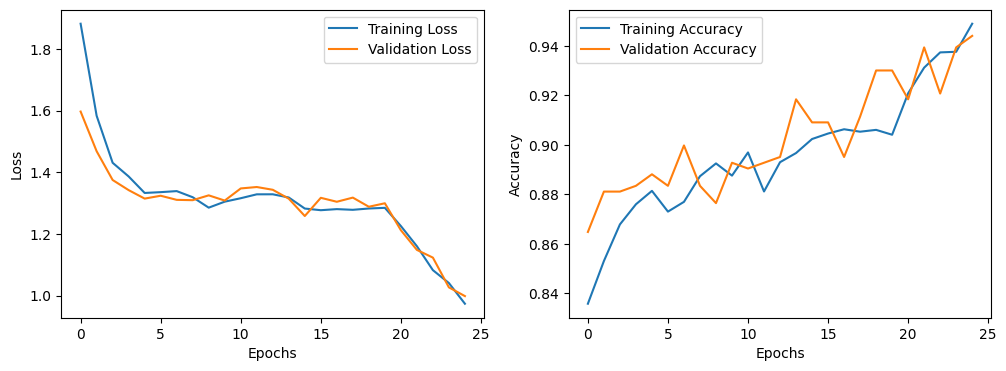

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(validation_gen)  # Replace with your test data generator
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

14/14 [==============================] - 7s 470ms/step - loss: 0.9947 - accuracy: 0.9301
Test Loss: 0.9947
Test Accuracy: 0.93


In [ ]:
import os

# Define the path to your desired location in Google Drive
save_path = '/content/drive/My Drive/models/model.h5'
model.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
